In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import kid_readout.utils.readoutnc

In [36]:
rnc1 = kid_readout.utils.readoutnc.ReadoutNetCDF('/artemis/readout/2016-02-11_143705_scan_lo_1200.0_MHz_mmw_on.nc')
#rnc = kid_readout.utils.readoutnc.ReadoutNetCDF('/artemis/readout/2016-02-11_150727_scan_lo_1770.0_MHz_mmw_on.nc')
rnc = kid_readout.utils.readoutnc.ReadoutNetCDF('/artemis/readout/2016-02-11_170516_scan_lo_1200.0_MHz_mmw_on.nc')

In [37]:
swg = rnc.sweeps[0]
swg1 = rnc1.sweeps[0]

In [38]:
fr = swg.frequency[:]
s21 = swg.s21[:]
data = swg.timestream_group.data[:]
fr1 = swg1.frequency[:]
s21_1 = swg1.s21[:]


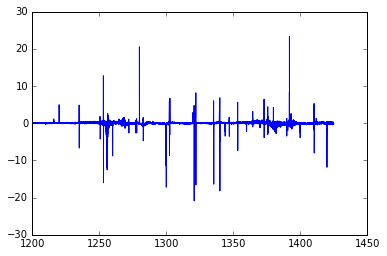

In [43]:
plot(fr,20*np.log10(np.abs(s21)/np.abs(s21_1)))

(1410, 1412)

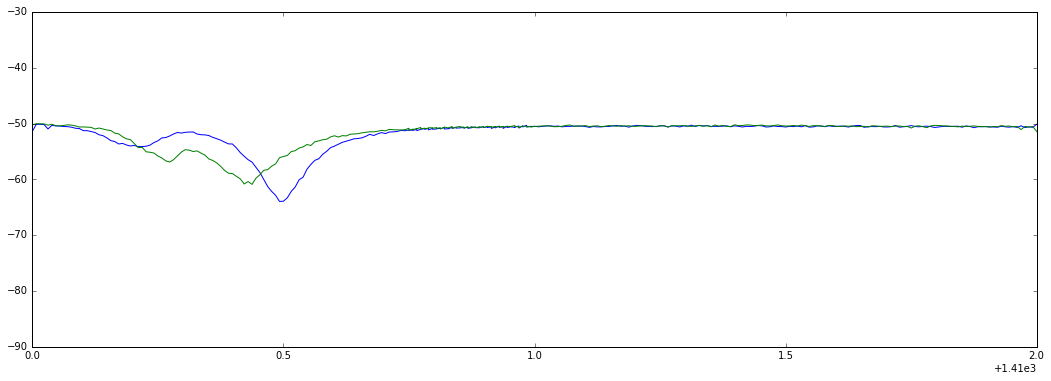

In [50]:
figure(figsize=(18,6))
plot(fr,20*np.log10(np.abs(s21)))
plot(fr1,20*np.log10(np.abs(s21_1)))
xlim(1410,1412)

In [7]:
data.shape

(32768, 8192)

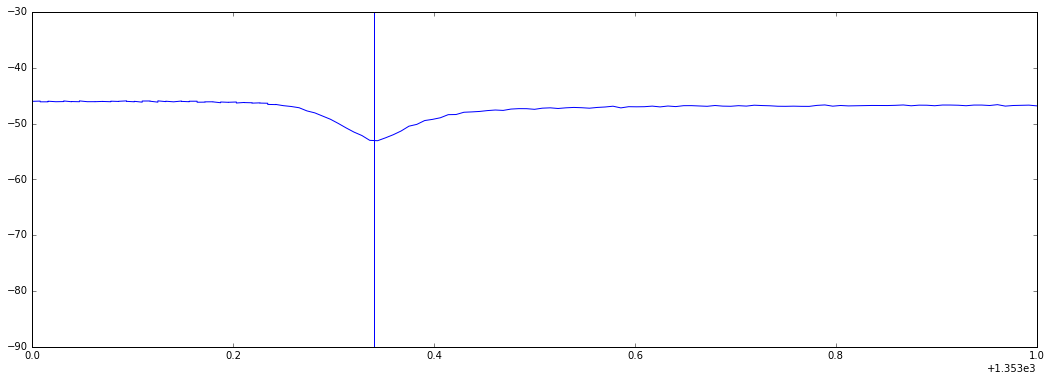

In [12]:
figure(figsize=(18,6))
plot(fr,20*np.log10(np.abs(s21)))
xlim(1353,1354)
gca().axvline(1353.34)

In [13]:
f0 = 1353.34
idx = np.abs(fr-f0).argmin()
print idx

22316


In [15]:
d = data[idx,:]

In [21]:
df = d.reshape((-1,256))

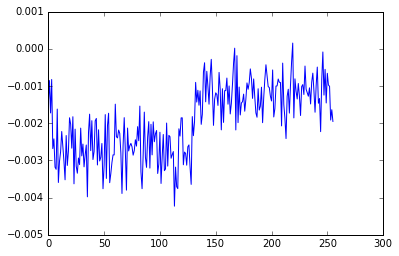

In [23]:
plot(df.imag.mean(0))

In [7]:
df = data.reshape((2**15,-1,256)).mean(1)

In [25]:
df.shape

(32768, 256)

In [8]:
resp = np.abs(df[:,32:96].mean(1)-df[:,150:240].mean(1))
#xlim(1300,1310)

In [9]:
def smooth_by(x,factor=16):
    return x.reshape((-1,factor)).mean(1)

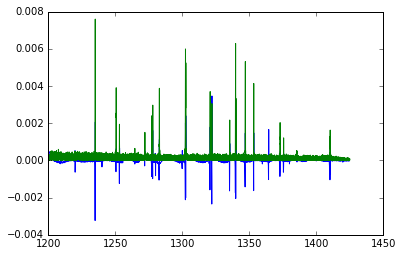

In [10]:
plot(smooth_by(fr)[:-1],np.diff(smooth_by(np.abs(s21))))
plot(fr,resp)
#xlim(1250,1310)
#ylim(-1e-3,1e-3)

(1280, 1310)

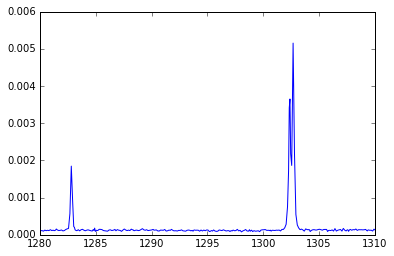

In [44]:
plot(smooth_by(fr),smooth_by(resp))
xlim(1280,1310)
#ylim(0,3e-4)

In [35]:
sfr = smooth_by(fr)
sresp = smooth_by(resp)
mask = sresp > 3e-4

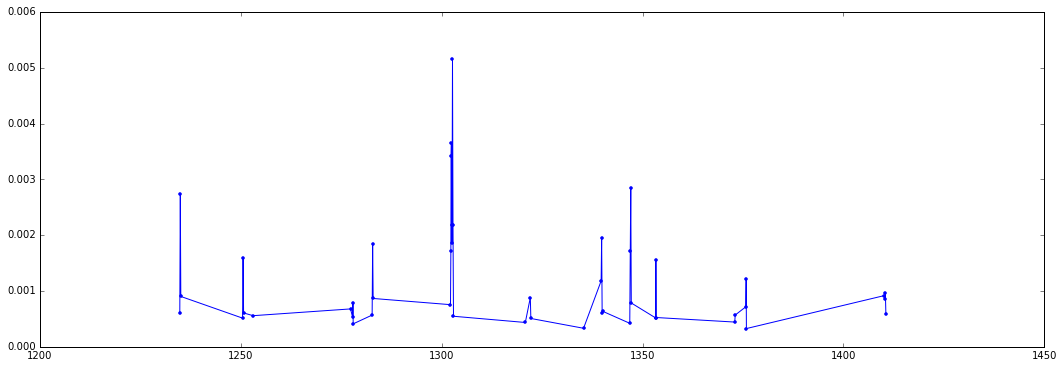

In [39]:
figure(figsize=(18,6))
plot(sfr[mask],sresp[mask],'.-')

In [11]:
s21c = s21*np.exp(-2j*31.297*fr*np.pi)

In [73]:
1/np.diff(fr)[0]

128.0

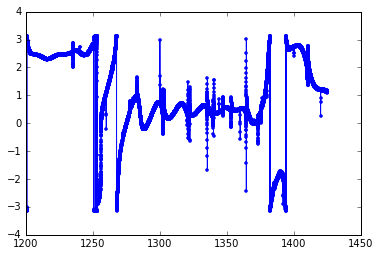

In [12]:
plot(fr,np.angle(s21c),'.-')
#xlim(1250,1260)

In [13]:
import kid_readout.analysis.resonator
reload(kid_readout.analysis.resonator)

/home/gjones/anaconda/envs/readout/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


<module 'kid_readout.analysis.resonator' from '/home/gjones/kid_readout/kid_readout/analysis/resonator.pyc'>

In [70]:
np.diff(fr)

array([ 0.0078125,  0.0078125,  0.0078125, ...,  0.0078125,  0.0078125,
        0.0078125])

In [14]:
chunk_size=128*2
fr_chunks = fr.reshape((-1,chunk_size))
s21_chunks = s21.reshape((-1,chunk_size))
fits = [kid_readout.analysis.resonator.fit_best_resonator(fr_chunks[k,:],s21_chunks[k,:],min_a=1) for k in range(fr_chunks.shape[0])]

In [25]:
chunk_size = 256
step_size = chunk_size/2
nstep = fr.shape[0]//step_size
fits = []
for k in range(nstep):
    fr_chunk = fr[step_size*k:step_size*k+chunk_size]
    s21_chunk = s21c[step_size*k:step_size*k+chunk_size]
    fits.append(kid_readout.analysis.resonator.fit_best_resonator(fr_chunk,s21_chunk,min_a=1))

In [26]:
Qs = np.array([x.Q for x in fits])
f0s = np.array([x.f_0 for x in fits])

In [27]:
good_fits = np.flatnonzero((Qs>2e3) & (Qs<1e5))

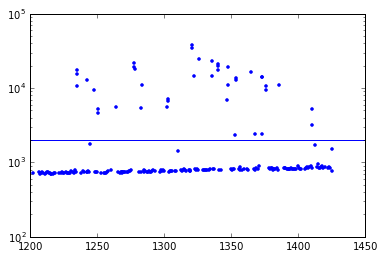

In [28]:
semilogy(f0s,Qs,'.')
ylim(1e2,1e5)
#xlim(1250,1260)
gca().axhline(2e3)

In [29]:
len(good_fits)

41

In [87]:
len(fits)

256

In [108]:
ax.annotate?

In [34]:
np.abs(fit.residual()).sum()

0.050460927962188859

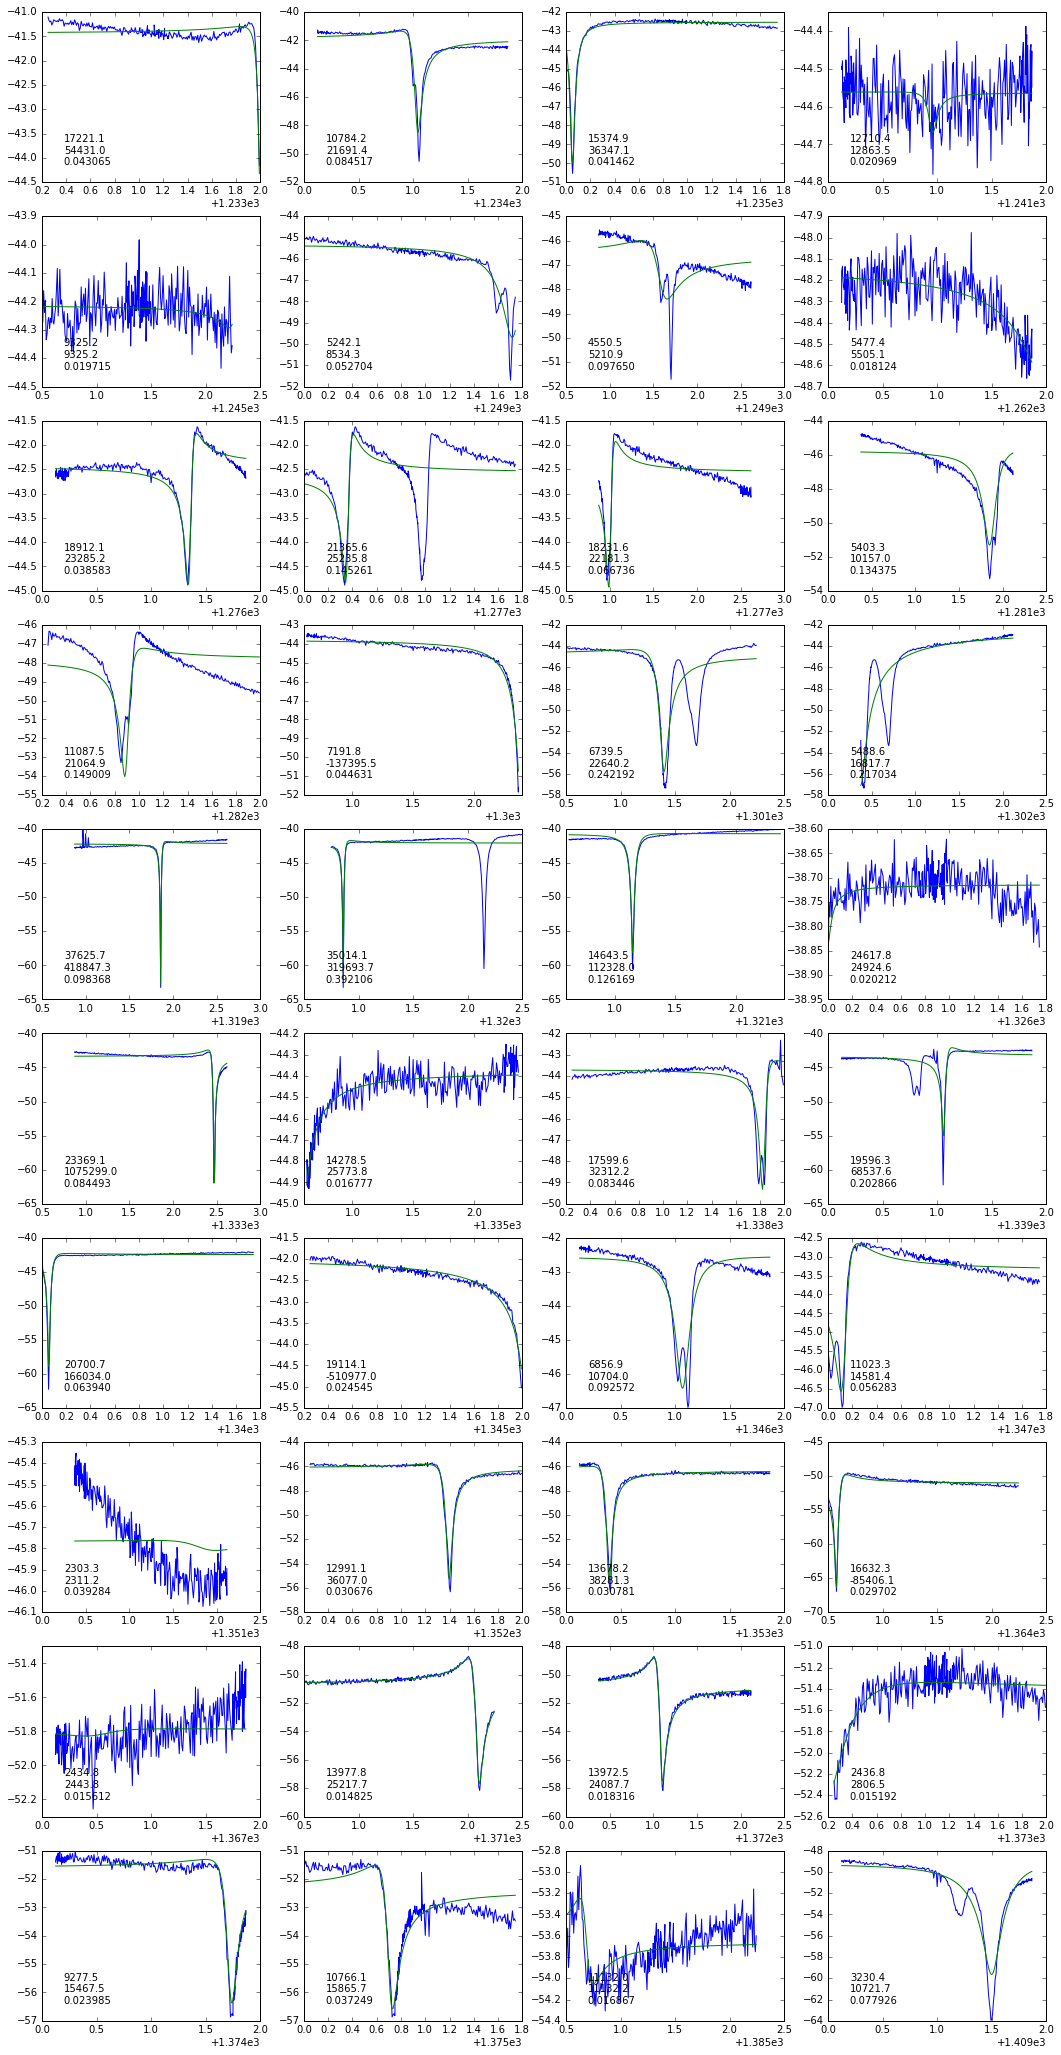

In [35]:
fig,axs = subplots(10,4,figsize=(18,36))
for k in range(np.min((np.prod(axs.shape),len(good_fits)))):
    ax = axs.flatten()[k]
    fit = fits[good_fits[k]]
    ax.plot(fit.freq_data,20*np.log10(np.abs(fit.s21_data)))
    ax.plot(fit.freq_data,20*np.log10(np.abs(fit.model(x=fit.freq_data))))
    ax.text(0.1,0.1,('%.1f\n%.1f\n%f' % (fit.Q,fit.Q_i,np.abs(fit.residual()).sum())),transform=ax.transAxes,ha='left')

In [106]:
fit?

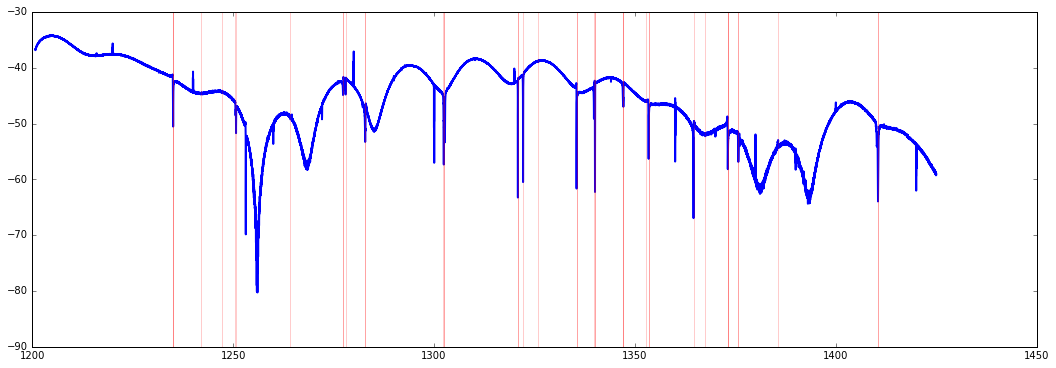

In [31]:
figure(figsize=(18,6))
plot(fr,20*np.log10(np.abs(s21)),lw=2)
for idx in good_fits:
    fit = fits[idx]
    gca().axvline(fit.f_0,color='r',alpha=.2)

In [84]:
group_1 = np.array([1235.06,
                   #1250.7,
                   1253.13,
                    1264.65,
                   1272.12,
                   1277.34,
                   #1277.97, #double
                   1282.85,
                   1302.41,
                   #1302.65, #double
                   1320.87,
                   1322.17,
                   1335.51,
                   #1339.8, #double
                   1340.06,
                   1347.19,
                   #1353.43,
                   1364.56,
                   1373.1,
                   #1375.75,
                    1385.65,
                   1410.5])
group_2 = np.array([#1785.,
                   1817.5,
                    1831.,
                   1849.7,
                    1852.35,
                   1869.6,
                   1874.4,
                   1886.15,
                   1894.9,
                   1910.67, #narrow, 1 of tripple
                   #1911.05,
                   #1911.3,
                   #1915.3,
                   1915.95,
                   1934.85,
                    #1959.75,
                    1960.75,
                   1961.23,#maybe image?
                   1988.3,
                    2014.7,
                    2054.75,
#                    2163.07,
#                    2309.45,
#                    2549.85
                    
                   ])

In [90]:
#np.save('/artemis/readout/resonances/2016-02-12-jpl-park-100nm-43-resonances.npy',np.hstack((group_1,group_2)))
np.save('/artemis/readout/resonances/2016-02-12-jpl-park-100nm-32-resonances.npy',np.hstack((group_1,group_2)))

In [85]:
group_1.shape

(16,)

In [86]:

group_2.shape

(16,)

In [87]:
group_2.mean()

1913.55

In [88]:
(group_2-group_2.mean()).ptp()

237.25

In [89]:
(group_1-group_1.mean()).ptp()

175.44000000000005